### gas station
- 데이터 크롤링
- 시각화 까지 boxplot - outlier

In [1]:
from selenium import webdriver

In [3]:
driver = webdriver.Chrome("./driver/chromedriver.exe")
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [6]:
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [7]:
sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="7ac94309-c7b2-4310-8228-b49da07f19de")>

In [8]:
sido_list_raw.__class__

selenium.webdriver.remote.webelement.WebElement

In [11]:
sido_list = sido_list_raw.find_elements_by_tag_name("option")
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="85eb7c2f-c322-4e68-adce-030c796e934a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="e7e0047e-9a02-4efc-8550-7fe16d854cd8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="fe375c7c-5647-4070-9cd4-ae2f66f647e3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="b8078259-388d-41fc-b7b1-6283958c9446")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="811948fb-2e7e-4f49-859b-aef23c515456")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="9b0480f7-67b9-41ad-8d60-3cb5a832d3d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fecae38f5868f8c1030e60522b35dcab", element="fc1306ac-d5e2-42cc-9036-72

In [13]:
sido_names = [option.get_attribute("value") for option in sido_list_raw.find_elements_by_tag_name("option")]
sido_names.remove("")
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [14]:
sido_list_raw.send_keys(sido_names[0])

In [16]:
gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0")
gu_names = [option.get_attribute("value") for option in gu_list_raw.find_elements_by_tag_name("option")]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [17]:
gu_list_raw.send_keys(gu_names[0])

In [18]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [19]:
soup.find_all('tbody')[0]

<tbody id="body1">
<!-- 일반휘발유 -->
<tr>
<td class="rlist">
<img alt="SK에너지" src="/images/user/com/ico_logo_sk.gif"/>
<a href="javascript:fn_osPop('','99999','1363','1165','99999','',' ','2020-11-05 10:57:51','2020-11-05 10:56:16',' ','','322226.27870','540914.76940','-내트럭 플러스 가맹점(복지카드 현장할인 15원, 총 40할인)&lt;br/&gt;-제휴 신용카드 주유할인(리터당 40원~120원) 및 포인트 적립','','-최신식 터널 버블세차 오픈&lt;br/&gt;-실내진공청소기,매트청소기 설치(내부청소 가능 self)-동전사용','','-최신식 터널 버블세차&lt;br/&gt;-주유시 승용 3000원,RV 4000원 &lt;br/&gt;-하부세차 상시 가능 (추가 1000원)&lt;br/&gt;-1000원상당 버블거품은 꽁짜! &lt;br/&gt;-진공청소기,매트청소기 사용 (1000원- 4분30초 최장시간)',' ','Y','N','SKE','(주)보성 세곡주유소','SK에너지','02-445-6870','서울 강남구  헌릉로 731 (세곡동)','Y','N','N','','N','A0001219','1208549361','N','N','N');">
																
																															
																
																	(주)보성 세곡주...
																	
																</a>
<span class="ic ico_self"><span class="ico">셀프</span></span>
</td>
<td class="price">
																
																1363
															</td>
<td

In [20]:
df = soup.find_all('tbody')[0]
df_page = df.find_all('td', 'rlist')
len(df_page)

38

In [21]:
df_page[0]

<td class="rlist">
<img alt="SK에너지" src="/images/user/com/ico_logo_sk.gif"/>
<a href="javascript:fn_osPop('','99999','1363','1165','99999','',' ','2020-11-05 10:57:51','2020-11-05 10:56:16',' ','','322226.27870','540914.76940','-내트럭 플러스 가맹점(복지카드 현장할인 15원, 총 40할인)&lt;br/&gt;-제휴 신용카드 주유할인(리터당 40원~120원) 및 포인트 적립','','-최신식 터널 버블세차 오픈&lt;br/&gt;-실내진공청소기,매트청소기 설치(내부청소 가능 self)-동전사용','','-최신식 터널 버블세차&lt;br/&gt;-주유시 승용 3000원,RV 4000원 &lt;br/&gt;-하부세차 상시 가능 (추가 1000원)&lt;br/&gt;-1000원상당 버블거품은 꽁짜! &lt;br/&gt;-진공청소기,매트청소기 사용 (1000원- 4분30초 최장시간)',' ','Y','N','SKE','(주)보성 세곡주유소','SK에너지','02-445-6870','서울 강남구  헌릉로 731 (세곡동)','Y','N','N','','N','A0001219','1208549361','N','N','N');">
																
																															
																
																	(주)보성 세곡주...
																	
																</a>
<span class="ic ico_self"><span class="ico">셀프</span></span>
</td>

In [22]:
df_page[0].img['alt']

'SK에너지'

In [23]:
df_page[0].span

<span class="ic ico_self"><span class="ico">셀프</span></span>

In [24]:
df_page[0].span.string

'셀프'

In [25]:
df_page[3].span

<span class="ic ico_self"><span class="ico">셀프</span></span>

In [27]:
type(df_page[3].span)

bs4.element.Tag

In [28]:
df_page[0].a.string

'\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t(주)보성 세곡주...\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'

In [29]:
df_price = df.find_all('td', 'price')
df_price

[<td class="price">
 																
 																1363
 															</td>,
 <td class="price">
 <font color="gray">
 																
 																1165
 																</font>
 </td>,
 <td class="price">
 																
 																1363
 															</td>,
 <td class="price">
 <font color="gray">
 																
 																1159
 																</font>
 </td>,
 <td class="price">
 																
 																1369
 															</td>,
 <td class="price">
 <font color="gray">
 																
 																1169
 																</font>
 </td>,
 <td class="price">
 																
 																1373
 															</td>,
 <td class="price">
 <font color="gray">
 																
 																1185
 																</font>
 </td>,
 <td class="price">
 																
 																1378
 															</td>,
 <td class="price">
 <font color="gray">
 																
 																1174
 																</font>
 </td>,
 <td class="pri

In [30]:
len(df_price)

76

In [31]:
df = soup.find_all('tbody')[0]
df_page = df.find_all('td', 'rlist')
[each.img['alt'] for each in df_page]

['SK에너지',
 '현대오일뱅크',
 'SK에너지',
 'GS칼텍스',
 '현대오일뱅크',
 'S-OIL',
 'SK에너지',
 'SK에너지',
 'SK에너지',
 'SK에너지',
 'GS칼텍스',
 'SK에너지',
 'S-OIL',
 'GS칼텍스',
 'S-OIL',
 'GS칼텍스',
 'GS칼텍스',
 'SK에너지',
 '현대오일뱅크',
 'GS칼텍스',
 'S-OIL',
 'GS칼텍스',
 '현대오일뱅크',
 'SK에너지',
 'SK에너지',
 '현대오일뱅크',
 '현대오일뱅크',
 '현대오일뱅크',
 'S-OIL',
 'SK에너지',
 'GS칼텍스',
 'SK에너지',
 'S-OIL',
 'SK에너지',
 'GS칼텍스',
 'GS칼텍스',
 'GS칼텍스',
 'SK에너지']

In [32]:
def get_brand(df):
    return [each.img['alt'] for each in df]

In [33]:
get_brand(df_page)

['SK에너지',
 '현대오일뱅크',
 'SK에너지',
 'GS칼텍스',
 '현대오일뱅크',
 'S-OIL',
 'SK에너지',
 'SK에너지',
 'SK에너지',
 'SK에너지',
 'GS칼텍스',
 'SK에너지',
 'S-OIL',
 'GS칼텍스',
 'S-OIL',
 'GS칼텍스',
 'GS칼텍스',
 'SK에너지',
 '현대오일뱅크',
 'GS칼텍스',
 'S-OIL',
 'GS칼텍스',
 '현대오일뱅크',
 'SK에너지',
 'SK에너지',
 '현대오일뱅크',
 '현대오일뱅크',
 '현대오일뱅크',
 'S-OIL',
 'SK에너지',
 'GS칼텍스',
 'SK에너지',
 'S-OIL',
 'SK에너지',
 'GS칼텍스',
 'GS칼텍스',
 'GS칼텍스',
 'SK에너지']

In [34]:
tmp = []

for each in df_page:
    if each.span is None:
        tmp.append('')
    else:
        tmp.append(each.span.string)
        
tmp

['셀프',
 '셀프',
 '셀프',
 '셀프',
 '전산',
 '셀프',
 '셀프',
 '셀프',
 '셀프',
 '셀프',
 '전산',
 '전산',
 '전산',
 '전산',
 '전산',
 '',
 '전산',
 '셀프',
 '전산',
 '셀프',
 '셀프',
 '',
 '전산',
 '셀프',
 '',
 '전산',
 '전산',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '전산',
 '']

In [53]:
def get_isself(df):
    tmp = []

    for each in df:
        if each.span is None:
            tmp.append('N')
        else:
            tmp.append("Y")
    return tmp

In [39]:
get_isself(df_page)

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N']

In [40]:
name = []
for each in df_page:
    candi = each.a.string
    candi = candi.replace('\n', '')
    candi = candi.replace('\t', '')
    candi = candi.replace('.', '')
    name.append(candi)
name

['(주)보성 세곡주',
 '현대오일뱅크 도곡',
 '오일프러스 셀프',
 'GS칼텍스(주)직',
 '현대오일뱅크(주)',
 '방죽주유소',
 'SK서광주유소',
 '자곡셀프주유소',
 'SK에너지(주) ',
 '(유)동하석유 힐',
 '지에스칼텍스㈜ G',
 'SK에너지㈜ 진달',
 '(주)선진도곡주유',
 '지에스칼텍스㈜ 은',
 '에쓰-오일㈜직영 ',
 '역삼주유소',
 '지에스칼텍스㈜ 주',
 '대동석유 압구정주',
 '현대오일뱅크㈜직영',
 '지에스칼텍스㈜ 삼',
 '일원주유소',
 '에스제이에너지산업',
 '현대오일뱅크㈜직영',
 '(주)중앙에너비스',
 '대교주유소',
 '현대오일뱅크(주)',
 '현대오일뱅크(주)',
 '㈜새서울석유 새서',
 '명품주유소',
 '대청주유소',
 '대성석유(주)동호',
 'SK논현주유소',
 '경원주유소',
 '갤러리아주유소',
 '학여울주유소',
 '(주)만정에너지',
 '(주)소모에너지엔',
 '뉴서울(강남)']

In [52]:
def get_name(df):
    name = []
    for each in df:
        candi = each.a.string
        candi = candi.replace('\n', '')
        candi = candi.replace('\t', '')
        candi = candi.replace('.', '')
        name.append(candi)
    return name
    

In [43]:
df_price = df.find_all('td', 'price')
price = []

for each in df_price:
    print(each.string)


																
																1363
															
None

																
																1363
															
None

																
																1369
															
None

																
																1373
															
None

																
																1378
															
None

																
																1379
															
None

																
																1385
															
None

																
																1399
															
None

																
																1415
															
None

																
																1415
															
None

																
																1415
															
None

																
																1415
															
None

																
																1415
															
None

																
																1415
															
None

																
																1415
															
None

																
																1415
															
None

																
																1425
	

In [45]:
price = []

for each in df_price:
    if each.string is not None:
        tmp = each.string
        tmp = tmp.replace('\n', '')
        tmp = tmp.replace('\t', '')
        price.append(tmp)
price

['1363',
 '1363',
 '1369',
 '1373',
 '1378',
 '1379',
 '1385',
 '1399',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1425',
 '1433',
 '1441',
 '1441',
 '1448',
 '1458',
 '1461',
 '1468',
 '1550',
 '1586',
 '1598',
 '1637',
 '1698',
 '1766',
 '1777',
 '1788',
 '1845',
 '1848',
 '1858',
 '1913',
 '1913',
 '2025']

In [51]:
def get_price(df):
    price = []

    for each in df:
        if each.string is not None:
            tmp = each.string
            tmp = tmp.replace('\n', '')
            tmp = tmp.replace('\t', '')
            price.append(tmp)
    return price

In [47]:
get_price(df_price)

['1363',
 '1363',
 '1369',
 '1373',
 '1378',
 '1379',
 '1385',
 '1399',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1415',
 '1425',
 '1433',
 '1441',
 '1441',
 '1448',
 '1458',
 '1461',
 '1468',
 '1550',
 '1586',
 '1598',
 '1637',
 '1698',
 '1766',
 '1777',
 '1788',
 '1845',
 '1848',
 '1858',
 '1913',
 '1913',
 '2025']

In [48]:
import pandas as pd

def get_info_from_target_page(drv):
    html = drv.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    df_source = soup.find_all('tbody')[0]
    df_page = df_source.find_all('td', 'rlist')
    df_price = df_source.find_all('td', 'price')
    
    brand = get_brand(df_page)
    isself = get_isself(df_page)
    name = get_name(df_page)
    price = get_price(df_price)
    
    return pd.DataFrame({'상표':brand, '셀프': isself, '이름': name, '가격': price})

In [49]:
get_info_from_target_page(driver)

,상표,셀프,이름,가격
0,SK에너지,Y,(주)보성 세곡주,1363
1,현대오일뱅크,Y,현대오일뱅크 도곡,1363
2,SK에너지,Y,오일프러스 셀프,1369
3,GS칼텍스,Y,GS칼텍스(주)직,1373
4,현대오일뱅크,Y,현대오일뱅크(주),1378
5,S-OIL,Y,방죽주유소,1379
6,SK에너지,Y,SK서광주유소,1385
7,SK에너지,Y,자곡셀프주유소,1399
8,SK에너지,Y,SK에너지(주),1415
9,SK에너지,Y,(유)동하석유 힐,1415


In [54]:
import time
result = []
for gu in gu_names[0:2]:
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)
    
    result.append(get_info_from_target_page(driver))

In [55]:
raw_data = pd.concat(result)
raw_data.reset_index(inplace=True)
raw_data

,index,상표,셀프,이름,가격
0,0,현대오일뱅크,Y,현대오일뱅크 도곡,1363
1,1,SK에너지,Y,(주)보성 세곡주,1363
2,2,SK에너지,Y,오일프러스 셀프,1369
3,3,GS칼텍스,Y,GS칼텍스(주)직,1373
4,4,현대오일뱅크,Y,현대오일뱅크(주),1378
5,5,S-OIL,Y,방죽주유소,1379
6,6,SK에너지,Y,SK서광주유소,1385
7,7,SK에너지,Y,자곡셀프주유소,1399
8,8,S-OIL,Y,에쓰-오일㈜직영,1415
9,9,GS칼텍스,N,역삼주유소,1415


In [56]:
['a'] * 10

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

In [57]:
def get_info_from_target_page(drv, gu_name):
    html = drv.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    df_source = soup.find_all('tbody')[0]
    df_page = df_source.find_all('td', 'rlist')
    df_price = df_source.find_all('td', 'price')
    
    brand = get_brand(df_page)
    isself = get_isself(df_page)
    name = get_name(df_page)
    price = get_price(df_price)
    gu_list = [gu_name] * len(name)
    
    return pd.DataFrame({'상표':brand, '셀프': isself, '이름': name, '가격': price, '구': gu_list})

In [59]:
result = []

for gu in gu_names:
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)
    
    result.append(get_info_from_target_page(driver, gu))
    print(gu)
raw_data = pd.concat(result)
raw_data.reset_index(drop=True, inplace=True)
raw_data

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


,상표,셀프,이름,가격,구
0,SK에너지,Y,(주)보성 세곡주,1363,강남구
1,현대오일뱅크,Y,현대오일뱅크 도곡,1363,강남구
2,SK에너지,Y,오일프러스 셀프,1369,강남구
3,GS칼텍스,Y,GS칼텍스(주)직,1373,강남구
4,현대오일뱅크,Y,현대오일뱅크(주),1378,강남구
...,...,...,...,...,...
484,GS칼텍스,Y,지에스칼텍스㈜ 소,1315,중랑구
485,S-OIL,N,(주)기지에너지,1315,중랑구
486,SK에너지,Y,용마로주유소,1375,중랑구
487,S-OIL,N,재원에너지㈜ 범아,1388,중랑구


In [60]:
driver.close()

In [61]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      489 non-null    object
 1   셀프      489 non-null    object
 2   이름      489 non-null    object
 3   가격      489 non-null    object
 4   구       489 non-null    object
dtypes: object(5)
memory usage: 19.2+ KB


In [62]:
raw_data.head()

,상표,셀프,이름,가격,구
0,SK에너지,Y,(주)보성 세곡주,1363,강남구
1,현대오일뱅크,Y,현대오일뱅크 도곡,1363,강남구
2,SK에너지,Y,오일프러스 셀프,1369,강남구
3,GS칼텍스,Y,GS칼텍스(주)직,1373,강남구
4,현대오일뱅크,Y,현대오일뱅크(주),1378,강남구


In [63]:
raw_data['가격'] = raw_data['가격'].astype('float')

In [64]:
raw_data[raw_data['가격'] == '-']

,상표,셀프,이름,가격,구


In [65]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표      489 non-null    object 
 1   셀프      489 non-null    object 
 2   이름      489 non-null    object 
 3   가격      489 non-null    float64
 4   구       489 non-null    object 
dtypes: float64(1), object(4)
memory usage: 19.2+ KB


In [66]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표      489 non-null    object 
 1   셀프      489 non-null    object 
 2   이름      489 non-null    object 
 3   가격      489 non-null    float64
 4   구       489 non-null    object 
dtypes: float64(1), object(4)
memory usage: 19.2+ KB


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

f_path = "C://Windows/Fonts/malgun.ttf"
f_name = font_manager.FontProperties(fname=f_path).get_name()

rc('font', family=f_name)

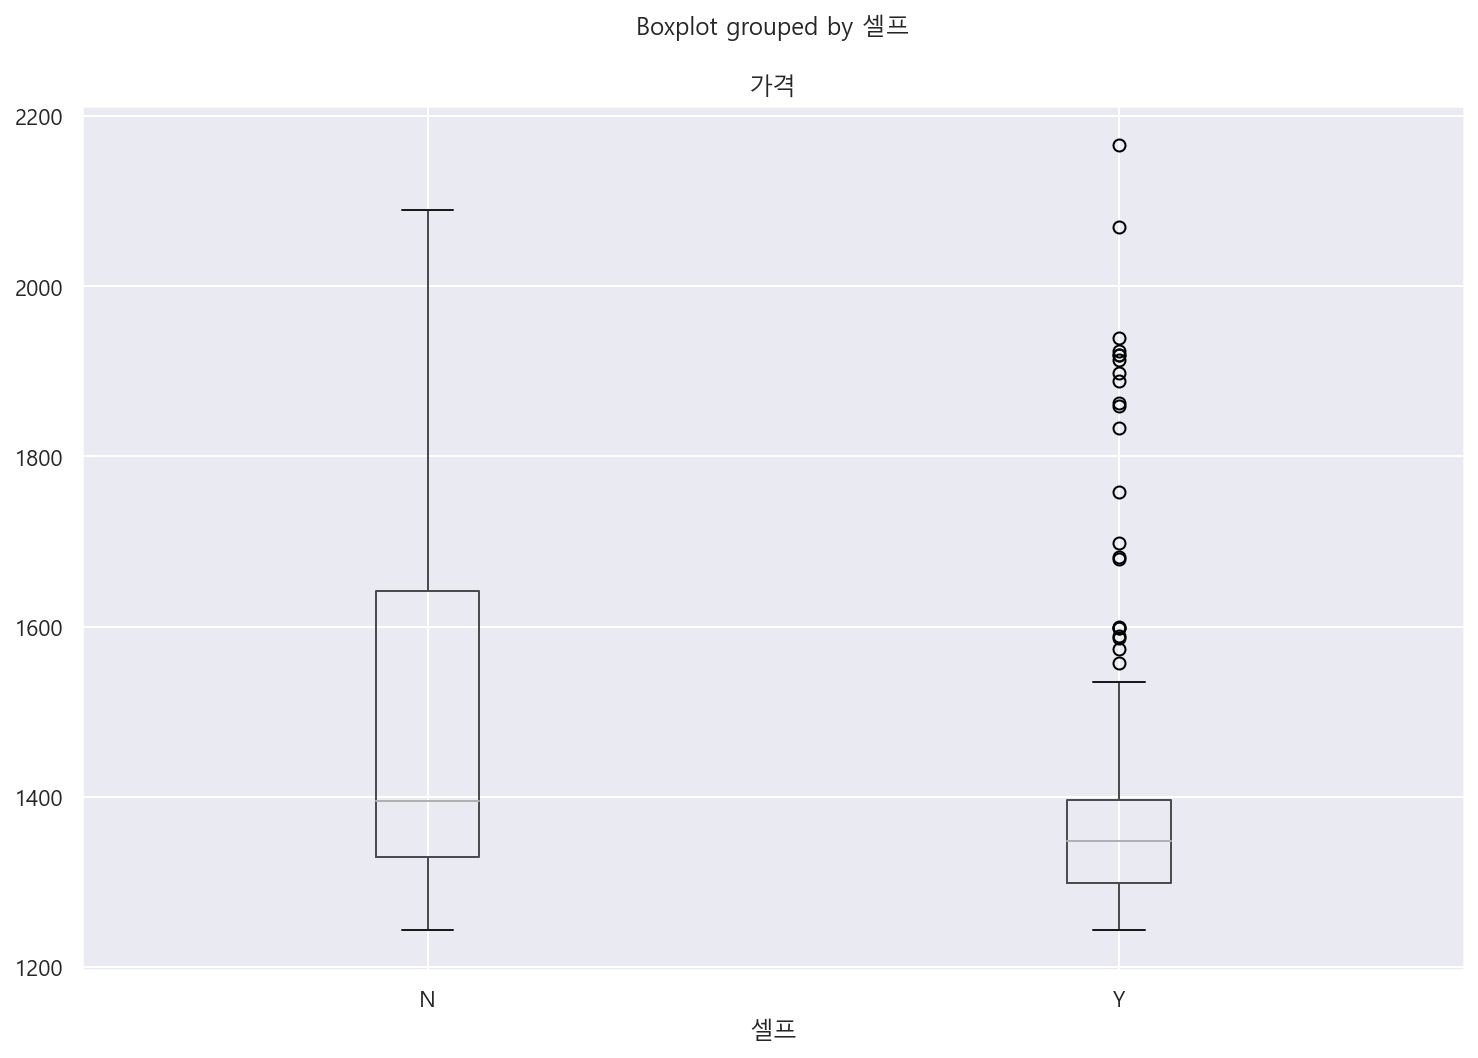

In [68]:
raw_data.boxplot(column = '가격', by='셀프', figsize=(12,8))

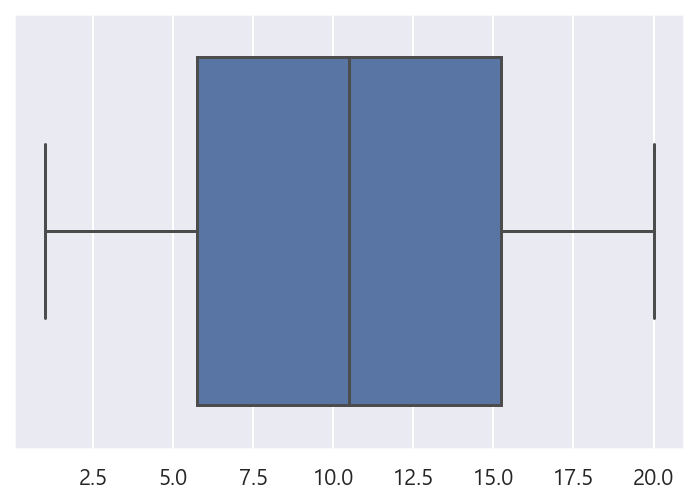

In [69]:
test_boxplot = range(1,21)
sns.boxplot(test_boxplot)

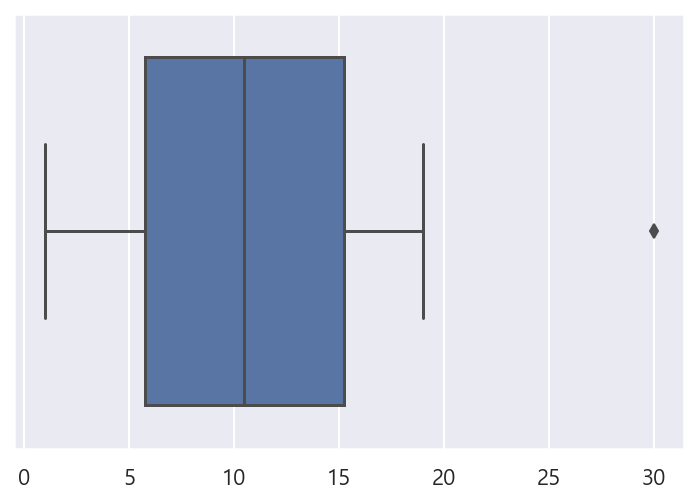

In [74]:
test_boxplot = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 30]
sns.boxplot(test_boxplot)

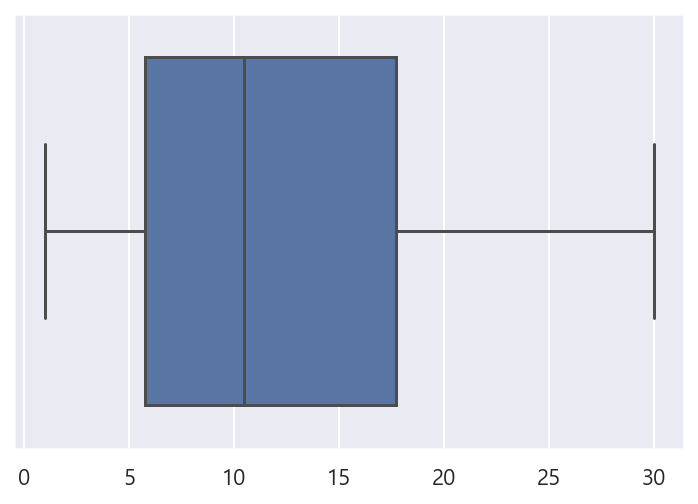

In [76]:
test_boxplot = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 27, 28, 29, 30]
sns.boxplot(test_boxplot)

In [77]:
samples =[1, 7, 9, 16, 36, 39, 45, 45, 46, 48, 51, 100, 101]
tmp_y = [1] * len(samples)

In [78]:
tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [79]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

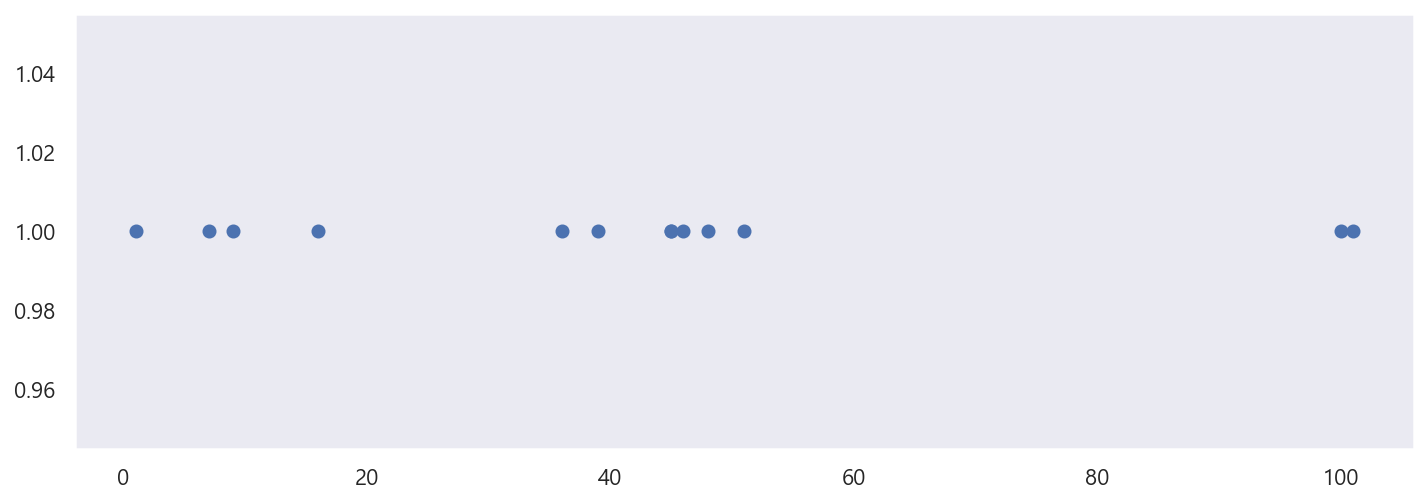

In [80]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [81]:
np.median(samples)

45.0

In [82]:
np.percentile(samples, 25)

16.0

In [83]:
np.percentile(samples, 75)

48.0

In [84]:
np.percentile(samples, 75) - np.percentile(samples, 25)

32.0

In [85]:
iqr = np.percentile(samples, 75) - np.percentile(samples, 25)
iqr*1.5

48.0

In [86]:
q1 = np.percentile(samples, 25)
q2 = np.median(samples)
q3 = np.percentile(samples, 75)

upper_fence = q3 + iqr*1.5
lower_fence = q1 - iqr*1.5

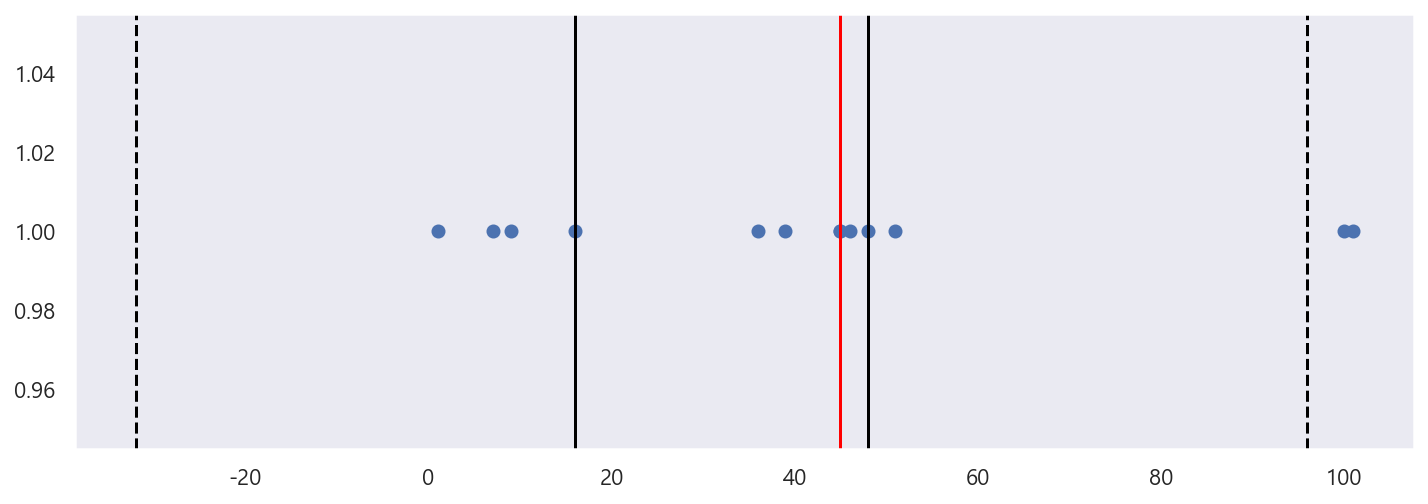

In [87]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.axvline(x=q1, color = 'black')
plt.axvline(x=q2, color = 'red')
plt.axvline(x=q3, color = 'black')
plt.axvline(x=upper_fence, color = 'black', ls = 'dashed')
plt.axvline(x=lower_fence, color = 'black', ls = 'dashed')

plt.grid()
plt.show()

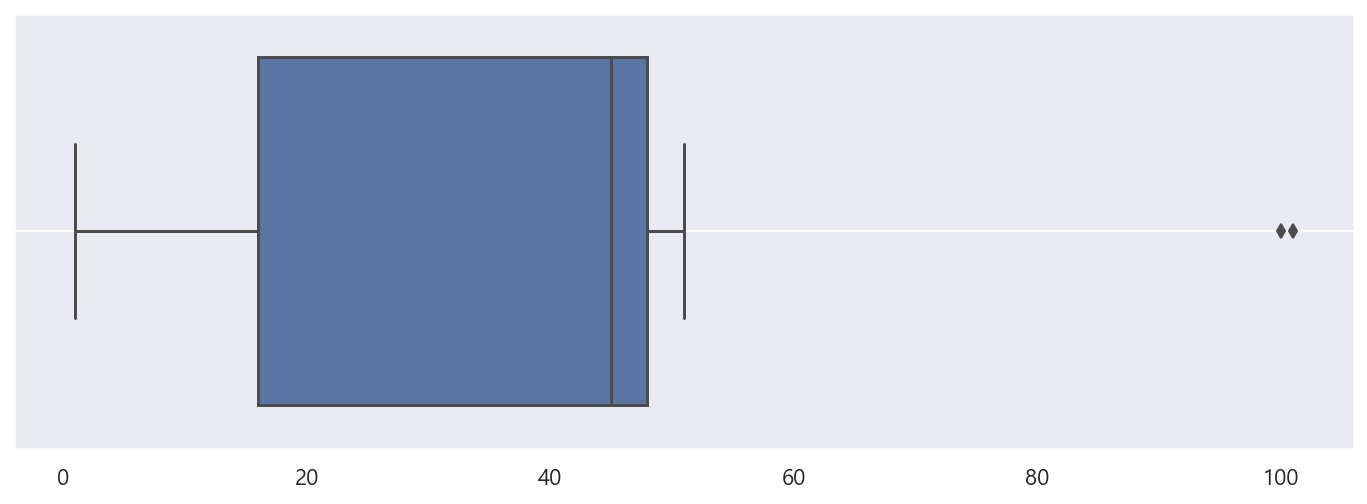

In [88]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.boxplot(samples)

plt.grid()
plt.show()

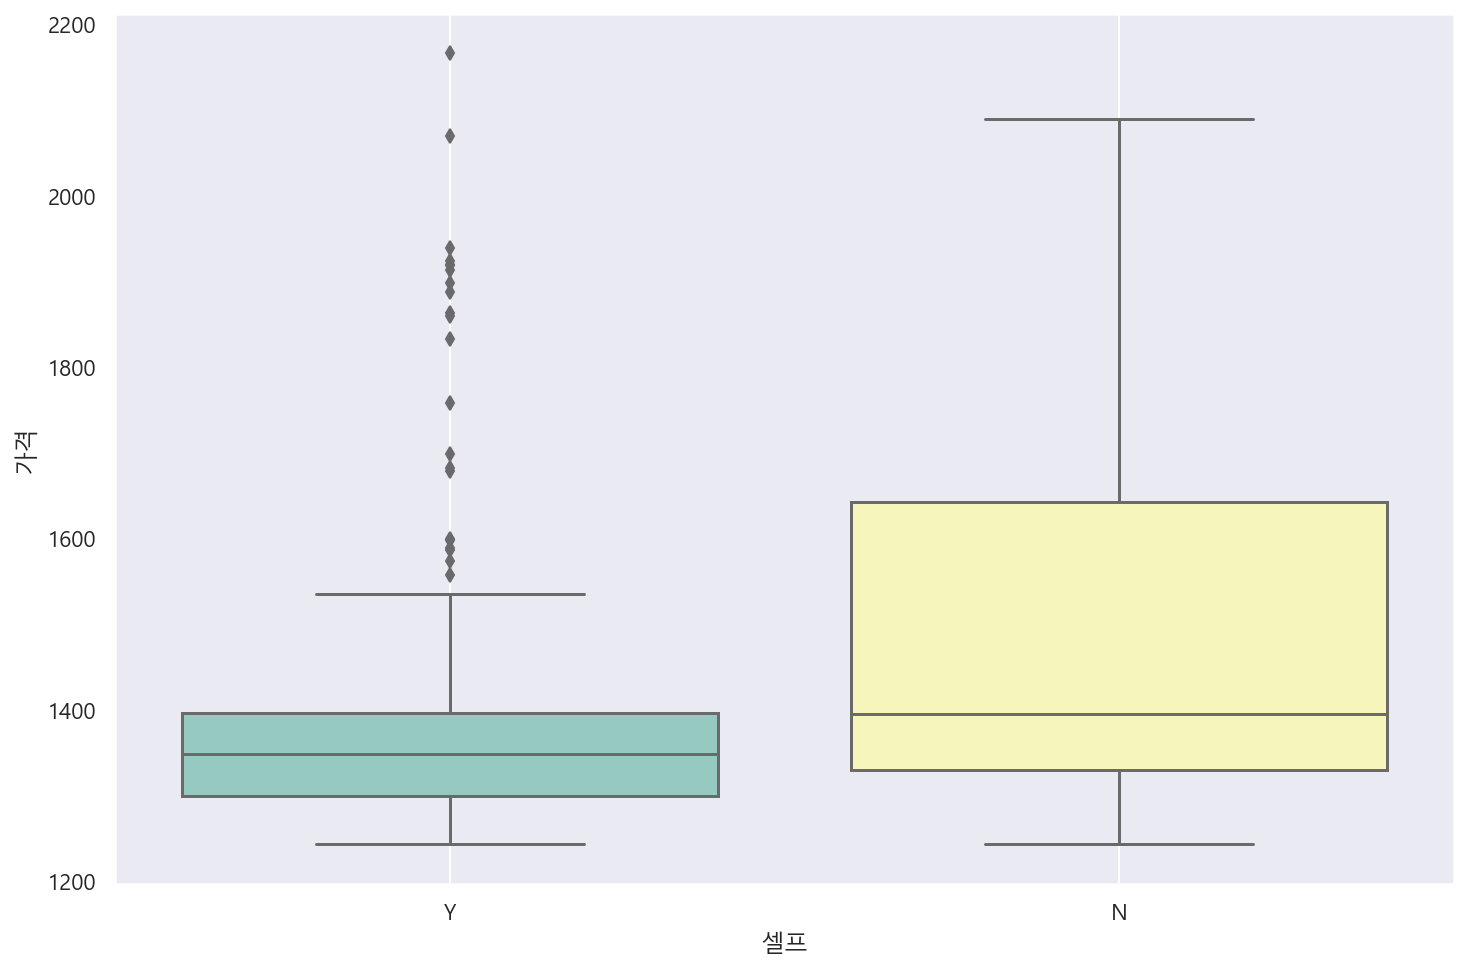

In [89]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=raw_data, palette="Set3")

plt.grid()
plt.show()

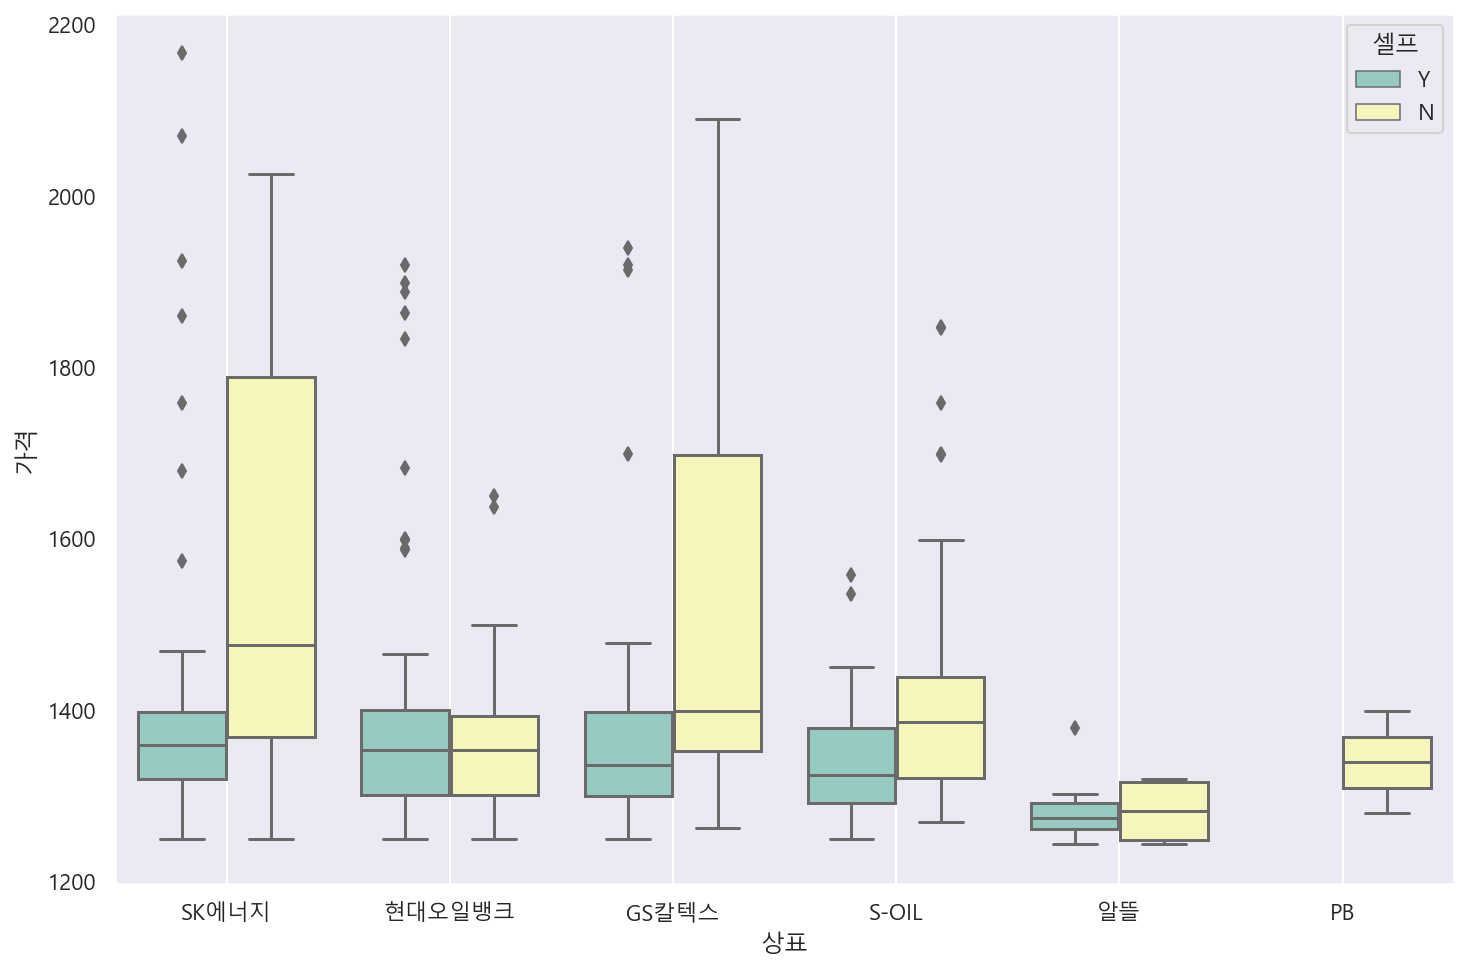

In [91]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=raw_data, palette="Set3")

plt.grid()
plt.show()

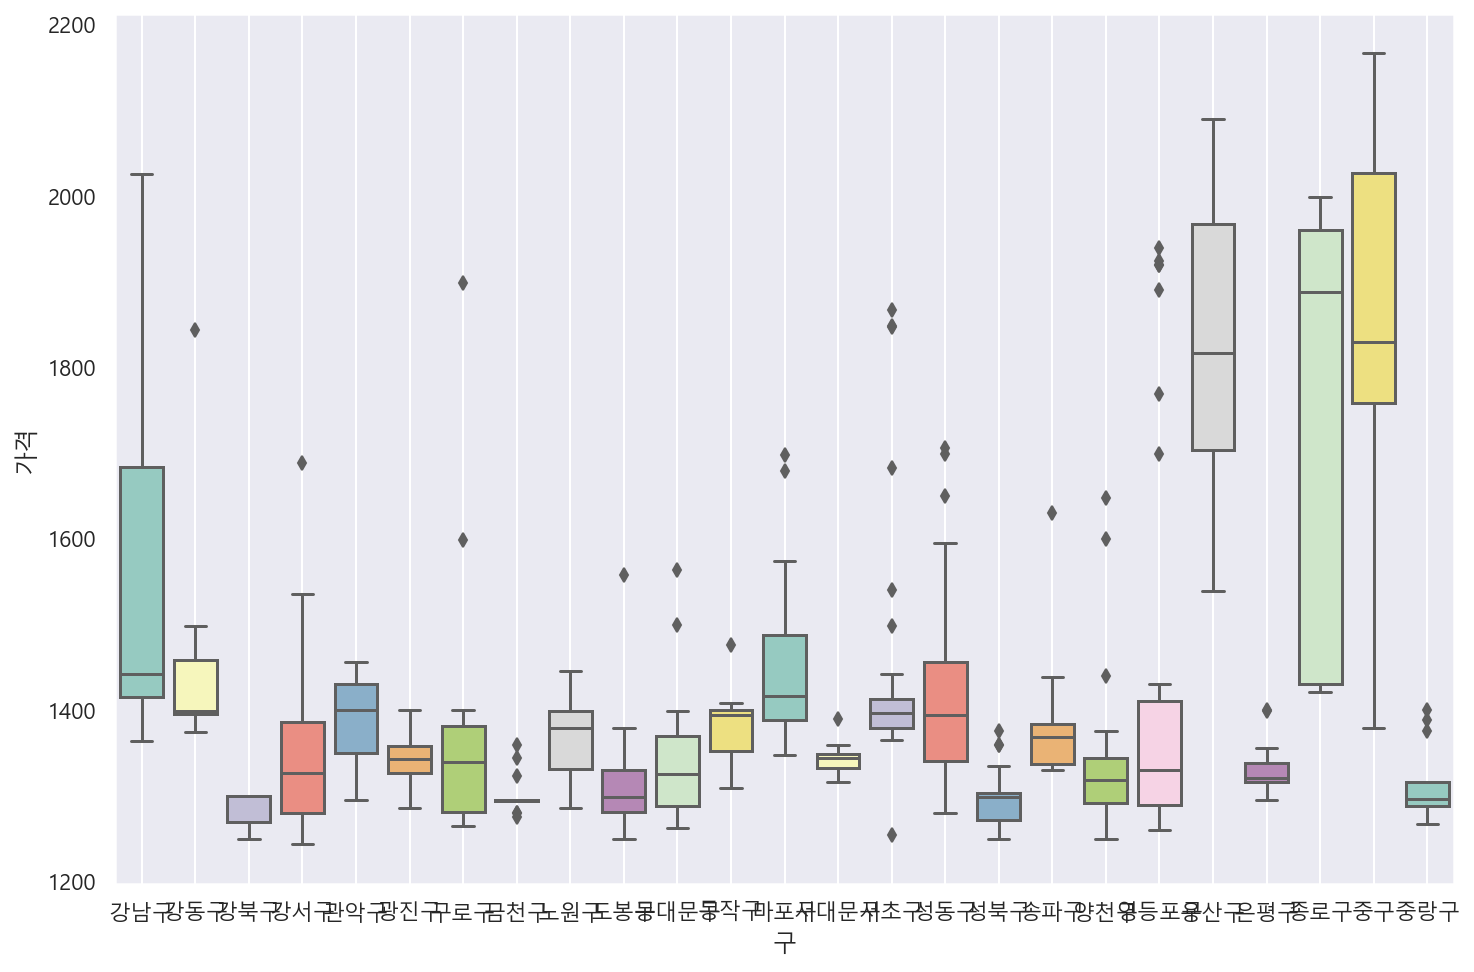

In [92]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="구", y="가격", data=raw_data, palette="Set3")

plt.grid()
plt.show()